In [1]:
%matplotlib inline

In [2]:
from pathlib import Path

from spectral_cube import SpectralCube
# from astropy.stats import mad_std

In [9]:
# !ls /reduction10/erickoch/LGLBS/line_imaging/derived/ic10/


In [4]:
data_path = Path("/reduction/erickoch/LGLBS/line_imaging/derived/")


ic10_cube = SpectralCube.read(data_path / "ic10/ic10_C+D+tp_hi21cm_0p8kms_120pc.fits")
ngc6822_cube = SpectralCube.read(data_path / "ngc6822/ngc6822_C+D+tp_hi21cm_0p8kms_120pc.fits")
ic1613_cube = SpectralCube.read(data_path / "ic1613/ic1613_C+D+tp_hi21cm_0p8kms_120pc.fits")
wlm_cube = SpectralCube.read(data_path / "wlm/wlm_C+D+tp_hi21cm_0p8kms_120pc.fits")


In [5]:
ic10_cube.beam

Beam: BMAJ=31.331362974242488 arcsec BMIN=31.331362974242488 arcsec BPA=0.0 deg

In [6]:
ngc6822_cube.beam

Beam: BMAJ=47.59957067240685 arcsec BMIN=47.59957067240685 arcsec BPA=0.0 deg

In [7]:
ic1613_cube.beam

Beam: BMAJ=32.56812730217311 arcsec BMIN=32.56812730217311 arcsec BPA=0.0 deg

In [10]:
wlm_cube.beam

Beam: BMAJ=27.2252014942464 arcsec BMIN=17.078891199710398 arcsec BPA=-12.53542543613 deg

In [83]:
wlm_cube.header['CDELT2'] * 600 * 200

133.33333333332

In [84]:
ic10_dist = 790 * u.kpc
ngc6822_dist = 520 * u.kpc
ic1613_dist = 760 * u.kpc
wlm_dist = 980 * u.kpc


In [85]:
def center_slice(spat_shape, width=100):
    centy = spat_shape[0] // 2
    centx = spat_shape[1] // 2

    return (slice(centy-width, centy+width),
            slice(centy-width, centy+width))


def center_mad_std(cube):

    rms_noise = cube[-10:][(slice(None),) + center_slice(cube[0].shape)].mad_std()
    return rms_noise


/home/erickoch/anaconda3/envs/pyuvdata_ewk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


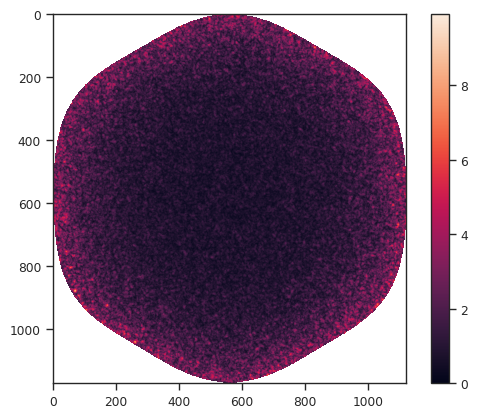

In [86]:


ic10_cube[-10:].mad_std(0).quicklook()
plt.colorbar()

/home/erickoch/anaconda3/envs/pyuvdata_ewk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


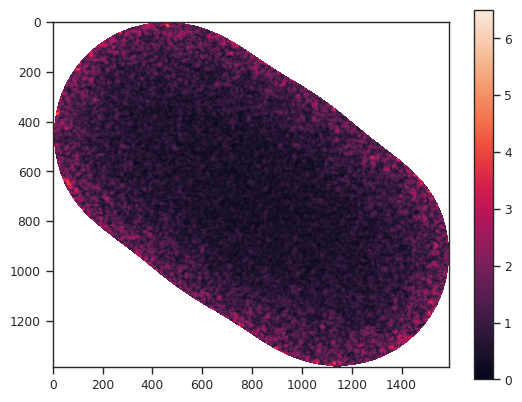

In [87]:
ngc6822_cube[-10:].mad_std(0).quicklook()
plt.colorbar()

/home/erickoch/anaconda3/envs/pyuvdata_ewk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


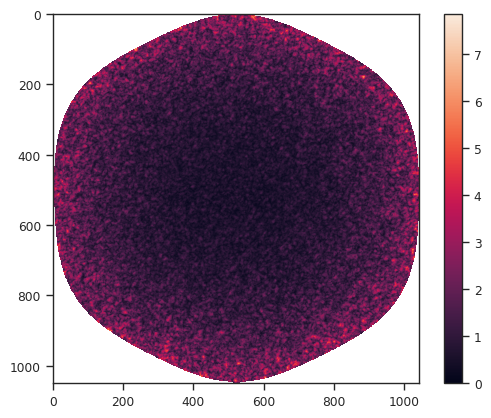

In [88]:
ic1613_cube[-10:].mad_std(0).quicklook()
plt.colorbar()

/home/erickoch/anaconda3/envs/pyuvdata_ewk/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


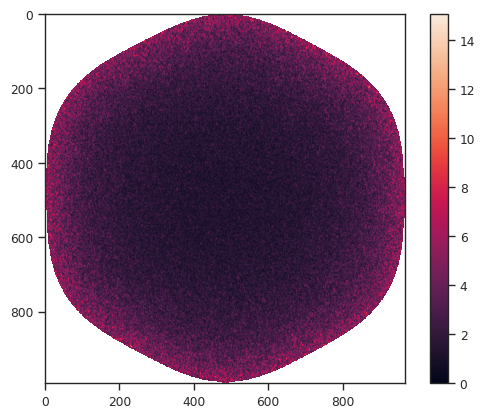

In [89]:
wlm_cube[-10:].mad_std(0).quicklook()
plt.colorbar()

In [90]:
ic10_rms = center_mad_std(ic10_cube)

ic10_rms

<Quantity 0.88016004 K>

In [91]:
ngc6822_rms = center_mad_std(ngc6822_cube)

ngc6822_rms

<Quantity 0.54087738 K>

In [92]:
ic1613_rms = center_mad_std(ic1613_cube)

ic1613_rms

<Quantity 0.68718842 K>

In [93]:
wlm_rms = center_mad_std(wlm_cube)

wlm_rms

<Quantity 1.55424305 K>

In [104]:
chan_width = np.abs(np.diff(ngc6822_cube.spectral_axis)[0]).to(u.km / u.s)

chan_width

target_width = 10 * u.km / u.s

def rms_coldens(rms, chan_width, target_width):

    rms_at_target = rms / np.sqrt(target_width / chan_width).to(u.one)
    rms_coldens = 1.82e18 * (u.cm**-2 / (u.K * u.km / u.s)) * rms_at_target * target_width.to(u.km / u.s)

    print(rms_at_target, rms_coldens)

    return rms_coldens

def rms_surfdens(rms, chan_width, target_width):

    rms_at_target = rms / np.sqrt(target_width / chan_width).to(u.one)
    rms_surfdens = (0.0196 / 1.4) * (u.solMass * u.pc**-2 / (u.K * u.km / u.s)) * rms_at_target * target_width.to(u.km / u.s)

    print(rms_at_target, rms_surfdens)

    return rms_surfdens

def beam_phys_size(beam, distance):
    return beam.sr.to(u.rad**2).value * distance.to(u.pc)**2
    
def rms_himass(coldens, beam, distance):

    beam_area = beam_phys_size(beam, distance)

    print(beam, beam_area)
    
    hi_mass = c.m_p.to(u.solMass) * (coldens * beam_area).to(u.one)

    print(hi_mass)
    
    return hi_mass

In [105]:
ic10_rms_coldens = rms_coldens(ic10_rms, chan_width, target_width)
ic10_rms_surfdens = rms_surfdens(ic10_rms, chan_width, target_width)

ic10_rms_himass = rms_himass(ic10_rms_coldens, ic10_cube.beam, ic10_dist)


0.25276150867063896 K 4.600259457805629e+18 1 / cm2
0.25276150867063896 K 0.03538661121388945 solMass / pc2
Beam: BMAJ=31.331362974242488 arcsec BMIN=31.331362974242488 arcsec BPA=0.0 deg 16316.496510577901 pc2
601.1767888416798 solMass


In [106]:
ngc6822_rms_coldens = rms_coldens(ngc6822_rms, chan_width, target_width)
ngc6822_rms_surfdens = rms_surfdens(ngc6822_rms, chan_width, target_width)


ngc6822_rms_himass = rms_himass(ngc6822_rms_coldens, ic10_cube.beam, ic10_dist)


0.1553274137616659 K 2.8269589304623196e+18 1 / cm2
0.1553274137616659 K 0.021745837926633226 solMass / pc2
Beam: BMAJ=31.331362974242488 arcsec BMIN=31.331362974242488 arcsec BPA=0.0 deg 16316.496510577901 pc2
369.4361388940716 solMass


In [107]:
ic1613_rms_coldens = rms_coldens(ic1613_rms, chan_width, target_width)
ic1613_rms_surfdens = rms_surfdens(ic1613_rms, chan_width, target_width)

ic1613_rms_himass = rms_himass(ic1613_rms_coldens, ic10_cube.beam, ic10_dist)


0.19734454326283768 K 3.591670687383646e+18 1 / cm2
0.19734454326283768 K 0.027628236056797276 solMass / pc2
Beam: BMAJ=31.331362974242488 arcsec BMIN=31.331362974242488 arcsec BPA=0.0 deg 16316.496510577901 pc2
469.37114530667435 solMass


In [108]:
wlm_rms_coldens = rms_coldens(wlm_rms, chan_width, target_width)
wlm_rms_surfdens = rms_surfdens(wlm_rms, chan_width, target_width)

wlm_rms_himass = rms_himass(wlm_rms_coldens, ic10_cube.beam, ic10_dist)


0.44634248550397476 K 8.12343323617234e+18 1 / cm2
0.44634248550397476 K 0.062487947970556464 solMass / pc2
Beam: BMAJ=31.331362974242488 arcsec BMIN=31.331362974242488 arcsec BPA=0.0 deg 16316.496510577901 pc2
1061.5965364747922 solMass


In [99]:
print(ic10_rms_coldens * 5)
print(ic1613_rms_coldens * 5)
print(ngc6822_rms_coldens * 5)
print(wlm_rms_coldens * 5)


2.3001297289028145e+19 1 / cm2
1.7958353436918231e+19 1 / cm2
1.4134794652311597e+19 1 / cm2
4.06171661808617e+19 1 / cm2


In [109]:
print(ic10_rms_surfdens * 5)
print(ic1613_rms_surfdens * 5)
print(ngc6822_rms_surfdens * 5)
print(wlm_rms_surfdens * 5)


0.17693305606944726 solMass / pc2
0.13814118028398636 solMass / pc2
0.10872918963316613 solMass / pc2
0.31243973985278234 solMass / pc2


In [100]:
print(ic10_rms_himass * 5)
print(ic1613_rms_himass * 5)
print(ngc6822_rms_himass * 5)
print(wlm_rms_himass * 5)

3005.883944208399 solMass
2346.8557265333716 solMass
1847.1806944703578 solMass
5307.98268237396 solMass
